# Import Libraries

In [101]:
#  basic library to handle the data 
import pandas as pd
import numpy as np
# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns
# feature engineering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#  to split the data 
from sklearn.model_selection import train_test_split


# classification models 
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# calculate the accuracy
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_curve

# Exploratory Data Analysis (EDA)

In [102]:
df = pd.read_csv("data/Employee.csv")
df.head(11)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [104]:
df.keys()

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [105]:
df.shape

(4653, 9)

In [106]:
df.nunique()

Education                     3
JoiningYear                   7
City                          3
PaymentTier                   3
Age                          20
Gender                        2
EverBenched                   2
ExperienceInCurrentDomain     8
LeaveOrNot                    2
dtype: int64

# Data Pre-Processing

## Dealing with missing data :

In [107]:
df.isnull().sum()  # there is no missing data

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

## Dealing with duplicate :

In [108]:
df[df.duplicated()]

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [109]:
df.duplicated().sum()

1889

In [110]:
df = df.drop_duplicates()
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [111]:
df.shape

(2764, 9)

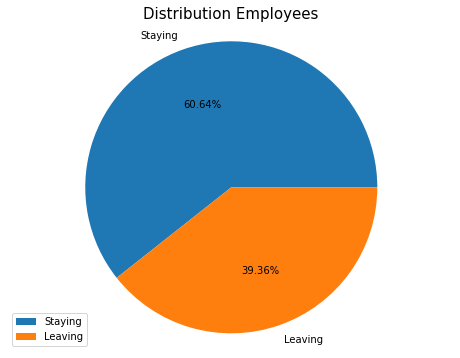

In [112]:
labels=df['LeaveOrNot'].value_counts().keys()
plt.figure(figsize=(8,6))
plt.pie(x= df['LeaveOrNot'].value_counts(),labels=['Staying', 'Leaving'], autopct="%0.2f%%")
plt.axis("equal")
plt.title("Distribution employees".title(), fontsize=15)
plt.legend()
plt.show()
#Most of the employess are not supposed to leave

# Explorating by Visualization 

##  - Gender

Are there more female or male employees?

In [113]:
df['Gender'].value_counts()

Male      1529
Female    1235
Name: Gender, dtype: int64

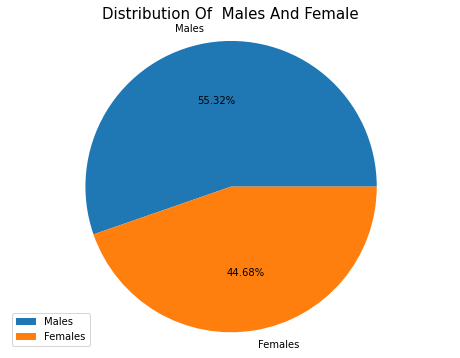

In [114]:
f=sum(df['Gender'] == 'Female')
m=sum(df['Gender'] == 'Male')
proportions = [m,f]
plt.figure(figsize=(8,6))
plt.pie(proportions,labels=['Males', 'Females'], autopct="%0.2f%%")
plt.axis("equal")
plt.title("Distribution of  Males and Female".title(), fontsize=15)
plt.legend()
plt.show()

Are there more female or male employees who are leaving the company?

In [115]:
num_f =sum(df[df['Gender'] == 'Female']['LeaveOrNot']==1) 
num_f

614

In [116]:
num_m= sum(df[df['Gender'] == 'Male']['LeaveOrNot']==1)
num_m

474

- Female Employees are more likley to leave their job.

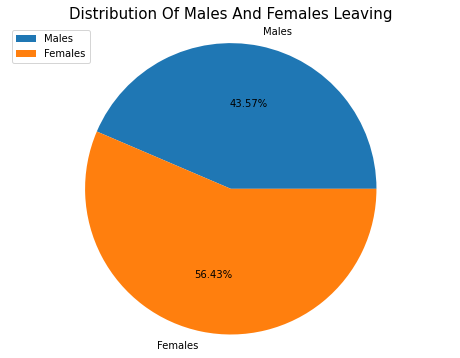

In [117]:
proportions = [num_m, num_f]
plt.figure(figsize=(8,6))
plt.pie(proportions,labels=['Males', 'Females'], autopct="%0.2f%%")
plt.axis("equal")
plt.title("Distribution of Males and Females leaving".title(), fontsize=15)
plt.legend()
plt.show()

## - Age

In [118]:
df['Age'].value_counts()

28    365
27    218
30    186
29    180
26    179
25    167
24    161
36    121
40    119
37    119
34    118
38    117
39    115
31    115
33    114
32    113
35    110
41     75
23     41
22     31
Name: Age, dtype: int64

What is the average age of the employees?

In [119]:
df['Age'] .mean()

30.952966714905934

Is there a relationship between age and employee leaving the company?

In [120]:
df.groupby(['Age','LeaveOrNot'])['LeaveOrNot'].count()

Age  LeaveOrNot
22   0              17
     1              14
23   0              28
     1              13
24   0              80
     1              81
25   0              79
     1              88
26   0              85
     1              94
27   0             116
     1             102
28   0             224
     1             141
29   0             116
     1              64
30   0             112
     1              74
31   0              80
     1              35
32   0              65
     1              48
33   0              77
     1              37
34   0              80
     1              38
35   0              68
     1              42
36   0              80
     1              41
37   0              77
     1              42
38   0              82
     1              35
39   0              79
     1              36
40   0              79
     1              40
41   0              52
     1              23
Name: LeaveOrNot, dtype: int64

<AxesSubplot:title={'center':'Number of employees by Age '}, xlabel='Age', ylabel='count'>

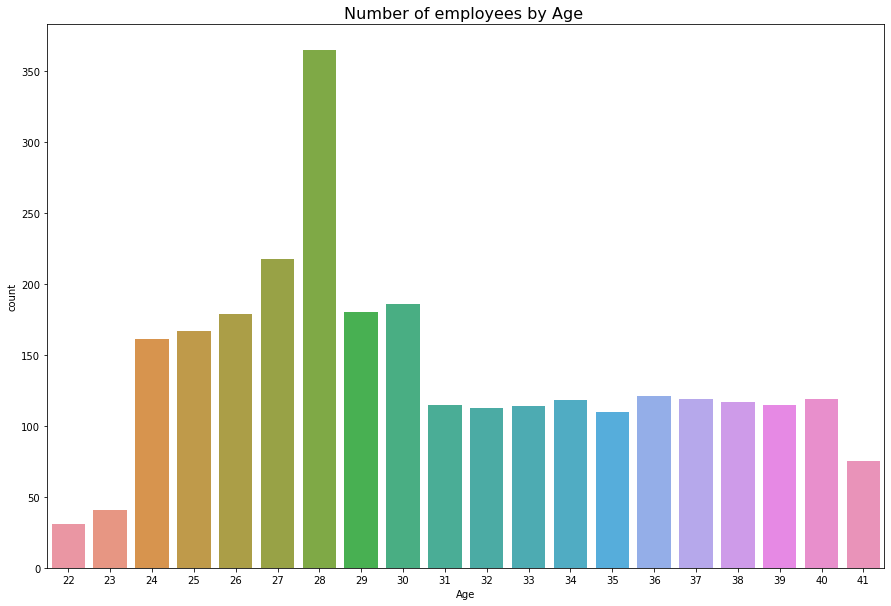

In [121]:
plt.figure(figsize=(15,10))
plt.title("Number of employees by Age ", fontsize=16)
sns.countplot(x = df['Age'])

Most of Employees are between 24 to 30 years old.

What is the most age group that will leave the company?

<AxesSubplot:xlabel='Age', ylabel='count'>

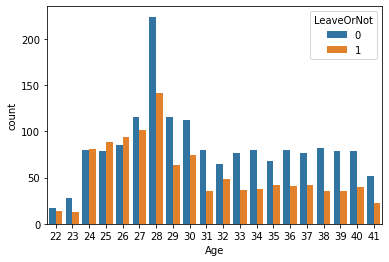

In [122]:
sns.countplot(x = df['Age'],hue=df['LeaveOrNot'])

Most of Employees are between 24 to 28 years old are more likely to leave.

##  - City 

How many cities does the company's employees live in?

In [123]:
df['City'].value_counts() # Most of the Employees are from bangalore

Bangalore    1171
Pune          801
New Delhi     792
Name: City, dtype: int64

What city has the most employees leaving the company?

In [124]:
df.groupby(['City','LeaveOrNot'])['City'].count()

City       LeaveOrNot
Bangalore  0             761
           1             410
New Delhi  0             522
           1             270
Pune       0             393
           1             408
Name: City, dtype: int64

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

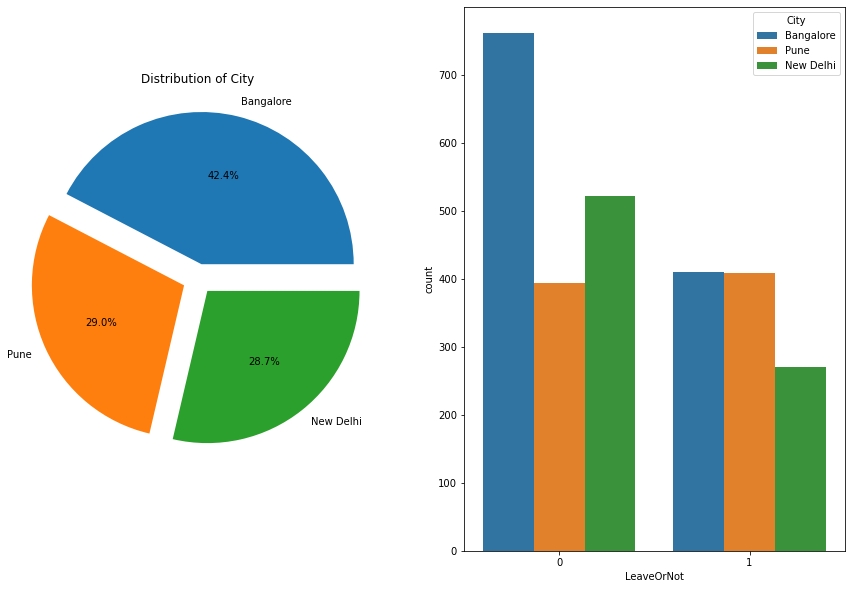

In [125]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
labels = df['City'].value_counts().keys()
plt.pie(x = df['City'].value_counts() , 
       labels = labels,
       explode =  (0.1,0.1,0.1),
       autopct='%1.1f%%')
plt.title('Distribution of City')
plt.subplot(1,2,2)
sns.countplot(x = df['LeaveOrNot'], hue=df['City'])

42.4% employee are from Bangalore. Bangalore city employee are more likley to leave

 ##  - Education

What are the education levels for the employees?

In [126]:
df['Education'].value_counts() # Most of the Employees completed bachelors degree

Bachelors    1971
Masters       637
PHD           156
Name: Education, dtype: int64

Does the degree of education affect the employee’s leaving?

In [127]:
df.groupby(['Education','LeaveOrNot'])['Education'].count()

Education  LeaveOrNot
Bachelors  0             1232
           1              739
Masters    0              328
           1              309
PHD        0              116
           1               40
Name: Education, dtype: int64

In [128]:
Ba=sum(df[df['Education'] == 'Bachelors']['LeaveOrNot']==1) 
Ma =sum(df[df['Education'] == 'Masters']['LeaveOrNot']==1) 
Phd =sum(df[df['Education'] == 'PHD']['LeaveOrNot']==1) 
Edu =[Ba,Ma,Phd]
Edu

[739, 309, 40]

<AxesSubplot:xlabel='LeaveOrNot', ylabel='count'>

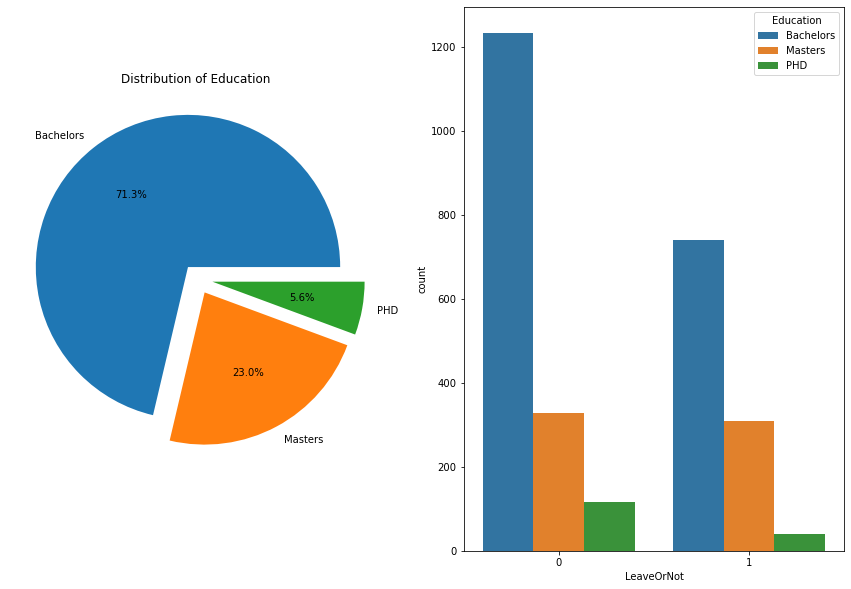

In [129]:
plt.figure(figsize = (15,10))
plt.subplot(1,2,1)
labels = df['Education'].value_counts().keys()
plt.pie(x = df['Education'].value_counts() , 
       labels = labels,
       explode =  (0.1,0.1,0.1),
       autopct='%1.1f%%')
plt.title('Distribution of Education ')
plt.subplot(1,2,2)
sns.countplot(x = df['LeaveOrNot'], hue=df['Education'])

71.3% of the Employees are Bachelors in this dataset followed by Masters and PHD. Employees with Bachelors Education are more likley to leave

## - JoiningYear

In [130]:
df['JoiningYear'].value_counts() #Most of the employees joined in the year 2017

2017    662
2015    464
2013    396
2014    385
2016    310
2012    308
2018    239
Name: JoiningYear, dtype: int64

In [131]:
df.groupby(['JoiningYear','LeaveOrNot'])['JoiningYear'].count()

JoiningYear  LeaveOrNot
2012         0             225
             1              83
2013         0             225
             1             171
2014         0             266
             1             119
2015         0             272
             1             192
2016         0             222
             1              88
2017         0             461
             1             201
2018         0               5
             1             234
Name: JoiningYear, dtype: int64

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

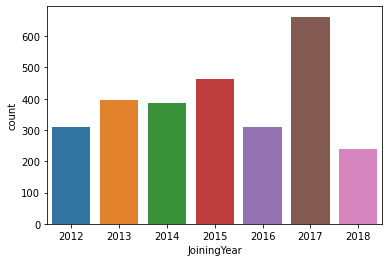

In [132]:
sns.countplot(x = df['JoiningYear'])

Most of employee joined in 2017 as shown in chart.

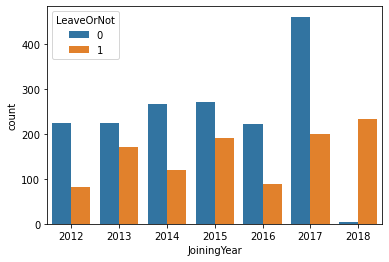

In [133]:
sns.countplot(x = df['JoiningYear'],hue=df['LeaveOrNot']);

Most number of employee who left the company were from year 2018, followed by year 2017 and 2015

## - EverBenched

In [134]:
df['EverBenched'].value_counts()

No     2403
Yes     361
Name: EverBenched, dtype: int64

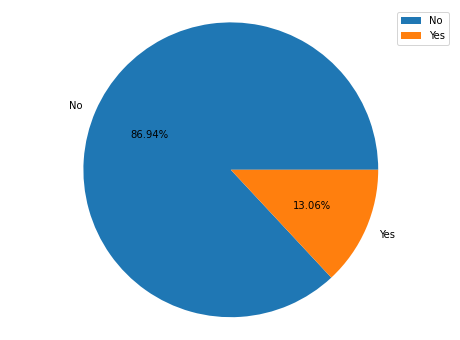

In [135]:

n=sum(df['EverBenched'] == 'No')
y=sum(df['EverBenched'] == 'Yes')
proportions = [n,y]
plt.figure(figsize=(8,6))
plt.pie(proportions,labels=['No', 'Yes'], autopct="%0.2f%%")
plt.axis("equal")
plt.legend()
plt.show()

# MODELS 

In [136]:
# preparing the data for the model--->(feature engineering)
# convert the categorical data to numarical by Encoding it 
en = LabelEncoder()
df["Education"] = en.fit_transform(df["Education"])
df["City"] = en.fit_transform(df["City"])
df["Gender"] = en.fit_transform(df["Gender"])
df["EverBenched"] = en.fit_transform(df["EverBenched"])
df["City"] = en.fit_transform(df["City"])

In [137]:
y = df['LeaveOrNot']
x = df.drop('LeaveOrNot', axis = 1)

# scale the data 
s = StandardScaler()
df = s.fit_transform(df)

#  split the data to train and test the model 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

## SVC MODEL

In [138]:
# _______________________________SVC model ___________________________
SVM = SVC()
# fit the data in the model
SVM.fit(x_train,y_train)
# let the model predict the answer
SVM_pr = SVM.predict(x_test)

# calculate the scores 
SVM_acc = accuracy_score(SVM_pr,y_test)
SVM_recall = recall_score(SVM_pr,y_test)
SVM_psion = precision_score(SVM_pr,y_test)
SVM_f1Score = f1_score(SVM_pr,y_test)


print("------- SVC scores  -------\n")
print("SVC accuracy_score:\t\t", SVM_acc)
print("SVC recall_score:\t\t", SVM_recall)
print("SVC precision_score:\t\t", SVM_psion)
print("SVC f1_score:\t\t\t", SVM_f1Score)

print("\n-------------------------------")

------- SVC scores  -------

SVC accuracy_score:		 0.613603473227207
SVC recall_score:		 0.0
SVC precision_score:		 0.0
SVC f1_score:			 0.0

-------------------------------


C:\Users\nsb  4  2021\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## QDA

In [139]:
# _______________________________QDA model ___________________________
# fit the data in the model
QDA = QuadraticDiscriminantAnalysis()
# fit the data in the model
QDA.fit(x_train,y_train)
# let the model predict the answer
QDA_pr = QDA.predict(x_test)

# calculate the scores 
QDA_acc = accuracy_score(QDA_pr,y_test)
QDA_recall = recall_score(QDA_pr,y_test)
QDA_psion = precision_score(QDA_pr,y_test)
QDA_f1Score = f1_score(QDA_pr,y_test)


print("------- QDA scores  -------\n")
print("QDA accuracy_score:\t\t", QDA_acc)
print("QDA recall_score:\t\t", QDA_recall)
print("QDA precision_score:\t\t", QDA_psion)
print("QDA f1_score:\t\t\t", QDA_f1Score)
print("\n-------------------------------")

------- QDA scores  -------

QDA accuracy_score:		 0.6801736613603473
QDA recall_score:		 0.6127450980392157
QDA precision_score:		 0.4681647940074906
QDA f1_score:			 0.5307855626326964

-------------------------------


## MLP

In [140]:
# _______________________________MLP model ___________________________
# fit the data in the model
MLP = MLPClassifier()
# fit the data in the model
MLP.fit(x_train,y_train)
# let the model predict the answer
MLP_pr = MLP.predict(x_test)

# calculate the scores 
MLP_acc = accuracy_score(MLP_pr,y_test)
MLP_recall = recall_score(MLP_pr,y_test)
MLP_psion = precision_score(MLP_pr,y_test)
MLP_f1Score = f1_score(MLP_pr,y_test)


print("------- MLP scores  -------\n")
print("MLP accuracy_score:\t\t", MLP_acc)
print("MLP recall_score:\t\t", MLP_recall)
print("MLP precision_score:\t\t", MLP_psion)
print("MLP f1_score:\t\t\t", MLP_f1Score)
print("\n-------------------------------")

------- MLP scores  -------

MLP accuracy_score:		 0.38639652677279307
MLP recall_score:		 0.38639652677279307
MLP precision_score:		 1.0
MLP f1_score:			 0.55741127348643

-------------------------------


## GaussianNB 

In [141]:
# _______________________________GaussianNB model ___________________________
# fit the data in the model
NB = GaussianNB()
# fit the data in the model
NB.fit(x_train,y_train)
# let the model predict the answer
NB_pr = NB.predict(x_test)

# calculate the scores 
NB_acc = accuracy_score(NB_pr,y_test)
NB_recall = recall_score(NB_pr,y_test)
NB_psion = precision_score(NB_pr,y_test)
NB_f1Score = f1_score(NB_pr,y_test)


print("------- GaussianNB scores  -------\n")
print("GaussianNB accuracy_score:\t\t", NB_acc)
print("GaussianNB recall_score:\t\t", NB_recall)
print("GaussianNB precision_score:\t\t", NB_psion)
print("GaussianNB f1_score:\t\t\t", NB_f1Score)
print("\n-------------------------------")

------- GaussianNB scores  -------

GaussianNB accuracy_score:		 0.6425470332850941
GaussianNB recall_score:		 0.545045045045045
GaussianNB precision_score:		 0.45318352059925093
GaussianNB f1_score:			 0.4948875255623722

-------------------------------


## DecisionTreeClassifier


In [142]:
# _______________________________ DecisionTreeClassifier model ___________________________
# fit the data in the model
DT = DecisionTreeClassifier()
# fit the data in the model
DT.fit(x_train,y_train)
# let the model predict the answer
DT_pr = DT.predict(x_test)

# calculate the scores 
DT_acc = accuracy_score(DT_pr,y_test)
DT_recall = recall_score(DT_pr,y_test)
DT_psion = precision_score(DT_pr,y_test)
DT_f1Score = f1_score(DT_pr,y_test)


print("------- DecisionTreeClassifier scores  -------\n")
print("DecisionTreeClassifier accuracy_score:\t\t", DT_acc)
print("DecisionTreeClassifier recall_score:\t\t", DT_recall)
print("DecisionTreeClassifier precision_score:\t\t", DT_psion)
print("DecisionTreeClassifier f1_score:\t\t", DT_f1Score)
print("\n-------------------------------")

------- DecisionTreeClassifier scores  -------

DecisionTreeClassifier accuracy_score:		 0.7062228654124457
DecisionTreeClassifier recall_score:		 0.6203007518796992
DecisionTreeClassifier precision_score:		 0.6179775280898876
DecisionTreeClassifier f1_score:		 0.6191369606003753

-------------------------------


## KNeighborsClassifier

In [143]:
# _______________________________ KNeighborsClassifier model ___________________________
# fit the data in the model
KNN = KNeighborsClassifier()
# fit the data in the model
KNN.fit(x_train,y_train)
# let the model predict the answer
KNN_pr = KNN.predict(x_test)

# calculate the scores 
KNN_acc = accuracy_score(KNN_pr,y_test)
KNN_recall = recall_score(KNN_pr,y_test)
KNN_psion = precision_score(KNN_pr,y_test)
KNN_f1Score = f1_score(KNN_pr,y_test)


print("------- KNeighborsClassifier scores  -------\n")
print("KNeighborsClassifier accuracy_score:\t\t", KNN_acc)
print("KNeighborsClassifier recall_score:\t\t", KNN_recall)
print("KNeighborsClassifier precision_score:\t\t", KNN_psion)
print("KNeighborsClassifier f1_score:\t\t\t", KNN_f1Score)
print("\n-------------------------------")

------- KNeighborsClassifier scores  -------

KNeighborsClassifier accuracy_score:		 0.7062228654124457
KNeighborsClassifier recall_score:		 0.6509433962264151
KNeighborsClassifier precision_score:		 0.5168539325842697
KNeighborsClassifier f1_score:			 0.5762004175365345

-------------------------------
